## Dijsktra's Climb
### Amanda Chang, Ashley Yang, Sally Lee, Arianne Fong

In [743]:
# Here we initialize our data and calculate the distances between each of our points.
import math

# use math.dist() to find distances between points 
# store using dictionary adjacency list --> get complete graph
# filter out to get new graph again
# apply dijkstra's to get short path

# getting the points. it's in order from a-w
all_coordinates = [
    [0,0],
    [1.6, 0.6],
    [1.1, 1.2],
    [2.7, 1.8],
    [1.2, 2.4],
    [0, 3.6],
    [2.2, 3.4],
    [2.2, 4.6],
    [0.6, 5.2],
    [-1.2, 4.6],
    [0, 5.8],
    [-1.6, 6.4],
    [2.2, 6.8],
    [1.6, 7.4],
    [0, 7.8],
    [0, 8.8],
    [-1.6, 9.4],
    [0, 10.8],
    [0, 12.0],
    [2.2, 12.7],
    [1.1, 13.7],
    [1.6, 14.2],
    [-0.4, 15.4]
]
edge_weights = {}
# finding edge weights between all points. will be stored in a list (index is starting vertex) of lists (index is ending vertex)
for i in range(len(all_coordinates)):
    edge_list = []
    for j in range(i+1, len(all_coordinates)):
        edge_list.append(math.dist(all_coordinates[i],all_coordinates[j]))
    edge_weights[i] = edge_list
        # outer loop index inner loop = math.dist([first point], [second point])

print(edge_weights)
print(len(edge_weights[0]))
distance_threshold=2.5

{0: [1.7088007490635062, 1.6278820596099706, 3.2449961479175906, 2.6832815729997477, 3.6, 4.049691346263318, 5.0990195135927845, 5.2345009313209605, 4.7539457296018846, 5.8, 6.596969000988257, 7.147027354082255, 7.57099729229908, 7.8, 8.8, 9.535197952848174, 10.8, 12.0, 12.889142717807108, 13.744089638822937, 14.289856542317, 15.40519392932137], 1: [0.7810249675906654, 1.6278820596099708, 1.8439088914585773, 3.4, 2.8635642126552705, 4.044749683231337, 4.707440918375928, 4.88262224629348, 5.440588203494178, 6.6241980646716785, 6.2289646009589745, 6.800000000000001, 7.37563556583431, 8.35463942968217, 9.363759928575702, 10.324727599312247, 11.511733144926527, 12.11486689980538, 13.10953851209111, 13.6, 14.934523762075576], 2: [1.7088007490635064, 1.2041594578792294, 2.6400757564888173, 2.459674775249769, 3.573513677041127, 4.031128874149275, 4.104875150354758, 4.729693436154187, 5.8591808301161015, 5.70701322935211, 6.220128616033595, 6.691038783328041, 7.679192665899197, 8.6330759292386

### Getting Complete Graph 

(Note: adjusted above code to get a dictionary with alphabet letters as keys, and for values a dictionary of the edge weights instead of a list)

In [751]:
import string
# getting our used letters
letters = string.ascii_uppercase
nodes_list = letters[:23]
print(nodes_list)

complete_graph = {} # overall dictionary ex. {"A": {"B":3, "C":4}}
# finding edge weights between all points. will be stored in a list (index is starting vertex) of lists (index is ending vertex)
for i in range(len(all_coordinates)):
    edge_weights_dict = {} # inner dictionary of edge weights to other nodes (ex. "A": 2) 
    for j in range(i+1, len(all_coordinates)):
        if i != j:
            # Calculate distance and store in both directions
            distance = math.dist(all_coordinates[i], all_coordinates[j])
            edge_weights_dict[nodes_list[j]] = distance # store edge to j with weights
    complete_graph[nodes_list[i]] = edge_weights_dict
        # outer loop index inner loop = math.dist([first point], [second point])

print(complete_graph)
print(complete_graph["A"])

ABCDEFGHIJKLMNOPQRSTUVW
{'A': {'B': 1.7088007490635062, 'C': 1.6278820596099706, 'D': 3.2449961479175906, 'E': 2.6832815729997477, 'F': 3.6, 'G': 4.049691346263318, 'H': 5.0990195135927845, 'I': 5.2345009313209605, 'J': 4.7539457296018846, 'K': 5.8, 'L': 6.596969000988257, 'M': 7.147027354082255, 'N': 7.57099729229908, 'O': 7.8, 'P': 8.8, 'Q': 9.535197952848174, 'R': 10.8, 'S': 12.0, 'T': 12.889142717807108, 'U': 13.744089638822937, 'V': 14.289856542317, 'W': 15.40519392932137}, 'B': {'C': 0.7810249675906654, 'D': 1.6278820596099708, 'E': 1.8439088914585773, 'F': 3.4, 'G': 2.8635642126552705, 'H': 4.044749683231337, 'I': 4.707440918375928, 'J': 4.88262224629348, 'K': 5.440588203494178, 'L': 6.6241980646716785, 'M': 6.2289646009589745, 'N': 6.800000000000001, 'O': 7.37563556583431, 'P': 8.35463942968217, 'Q': 9.363759928575702, 'R': 10.324727599312247, 'S': 11.511733144926527, 'T': 12.11486689980538, 'U': 13.10953851209111, 'V': 13.6, 'W': 14.934523762075576}, 'C': {'D': 1.7088007490635

### Filtering graph

Computing threshold

In order to compute our threshold, we first decided that we wanted to mimic the realistic constraint that for a climber who could campus the route, their reach limit is likely around half of their wingspan (barring them being a pro climber of course), since anything beyond that would require more of a muscle up like movement. So, we determined that a good value for our threshold would be around 76 cm, since assuming ape index of around 0 where a person's wingspan is roughly the same as their height, then 76 cm would be half of a 4'11 person. This seems like a sufficient metric, since most people are taller than 4'11 and so we can assume that our threshold is roughly inclusive. Through adjusting the grid on Abode Illustrator, and knowing that our wall is 15 ft, we know our coordinates are in units of feet; translating cm to feet we arrive at our 2.5 ft threshold.

In [746]:
# getting filtered graph, same as complete but added check
filtered_graph = {} # overall dictionary ex. {"A": {"B":3, "C":4}}
# finding edge weights between all points. will be stored in a list (index is starting vertex) of lists (index is ending vertex)
for i in range(len(all_coordinates)):
    edge_weights_dict = {} # inner dictionary of edge weights to other nodes (ex. "A": 2) 
    for j in range(i+1, len(all_coordinates)):
        if i != j:
            # Calculate distance and store in both directions
            distance = math.dist(all_coordinates[i], all_coordinates[j])
            if distance < 2.5:
                edge_weights_dict[nodes_list[j]] = distance # store edge to j with weights
    filtered_graph[nodes_list[i]] = edge_weights_dict
        # outer loop index inner loop = math.dist([first point], [second point])

print(filtered_graph)
print(filtered_graph["A"])

{'A': {'B': 1.7088007490635062, 'C': 1.6278820596099706}, 'B': {'C': 0.7810249675906654, 'D': 1.6278820596099708, 'E': 1.8439088914585773}, 'C': {'D': 1.7088007490635064, 'E': 1.2041594578792294, 'G': 2.459674775249769}, 'D': {'E': 1.6155494421403513, 'G': 1.676305461424021}, 'E': {'F': 1.6970562748477143, 'G': 1.4142135623730951, 'H': 2.416609194718914}, 'F': {'G': 2.209072203437452, 'H': 2.4166091947189146, 'I': 1.7088007490635062, 'J': 1.5620499351813306, 'K': 2.1999999999999997}, 'G': {'H': 1.1999999999999997, 'I': 2.4083189157584592}, 'H': {'I': 1.7088007490635064, 'M': 2.2}, 'I': {'J': 1.8973665961010275, 'K': 0.8485281374238568, 'M': 2.262741699796952, 'N': 2.4166091947189146}, 'J': {'K': 1.6970562748477143, 'L': 1.8439088914585782}, 'K': {'L': 1.7088007490635064, 'M': 2.4166091947189146, 'N': 2.2627416997969525, 'O': 2.0}, 'L': {'O': 2.1260291625469296}, 'M': {'N': 0.8485281374238575, 'O': 2.4166091947189146}, 'N': {'O': 1.6492422502470643, 'P': 2.12602916254693}, 'O': {'P': 1.

### Implementing Dijkstra's Algorithm

In [747]:
from heapq import heapify, heappop, heappush

# creating Graph class to run algorithm 
class Graph:
    def __init__(self, graph: dict = {}):
       self.graph = graph  # dictionary for the adjacency list
    
    def calculate_shortest_distances(self, source: str):
        # start all nodes w/ infinity value
        distances = {node: float("inf") for node in self.graph}
        distances[source] = 0  # Set the source value to 0

        # initialize a priority queue, turns list into heap
        priority_q = [(0, source)]
        heapify(priority_q)

        # set to hold visited nodes
        visited_nodes = set()

        while priority_q:  # while the priority queue isn't empty
            # get the node with the min distance
            current_distance, current_node = heappop(priority_q)  

            # skip node if already visited, add node to visited set otherwise
            if current_node in visited_nodes:
                continue  
            visited_nodes.add(current_node)  
        
            for neighbor, weight in self.graph[current_node].items():
            # Calculate the distance from current_node to the neighbor
                tentative_distance = current_distance + weight
                # if the culumative distance is shorter than previously recorded
                if tentative_distance < distances[neighbor]:
                    # set new distance
                    distances[neighbor] = tentative_distance
                    heappush(priority_q, (tentative_distance, neighbor))
            
            # getting the actual path  
            previous_nodes = {node: None for node in self.graph}
            for node, distance in distances.items():
                for neighbor, weight in self.graph[node].items():
                    if distances[neighbor] == distance + weight:
                        previous_nodes[neighbor] = node

        return distances, previous_nodes
    
    def get_shortest_path(self, source: str, target: str):
        # generate previous nodes dict
        _, previous_nodes = self.calculate_shortest_distances(source)

        path = []
        current_node = target

        # Backtrack from the target node using predecessors, until source node reached
        while current_node:
            path.append(current_node)
            current_node = previous_nodes[current_node]

        # Reverse the path and return it
        path.reverse()

        return path

In [748]:
G = Graph(filtered_graph)
shortest_path_AW = G.get_shortest_path("A", "W")
shortest_path_HW = G.get_shortest_path("H", "W")
print(f'From bottom A to top W: {shortest_path_AW}')
print(f'From actual start hold H to top W: {shortest_path_HW}')


From bottom A to top W: ['A', 'C', 'E', 'F', 'K', 'O', 'P', 'R', 'S', 'U', 'W']
From actual start hold H to top W: ['H', 'M', 'N', 'P', 'R', 'S', 'U', 'W']


## Implementing RDP

In [749]:
import math
from rdp import rdp

# Library Implementation
all_coordinates_dict = {}
for node, coordinate in zip(nodes_list, all_coordinates):
    all_coordinates_dict[node] = coordinate
shortest_path_HW_coord = [0] * len(shortest_path_HW)
for i, node in enumerate(shortest_path_HW):
    shortest_path_HW_coord[i] = all_coordinates_dict[node]
library_rdp_route = rdp(shortest_path_HW_coord, epsilon=0.1)

# Our own implementation, inspired by Wikipedia pseudocode
def distance(point1, point2):
    """
    Calculates Euclidean Distance between two points
    """
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

def perpendicular_distance(point, line_start, line_end):
    """
    Calculates perpendicular distance between the given line segment and the point
    Args:
        point: two floats encoding the x and y positions of the point
        line_start: a coordinate point of two floats encoding the start point of a line
        line_end: a coordinate point of two floats including the end point of a line
    """
    x0, y0 = point
    x1, y1 = line_start
    x2, y2 = line_end
    num = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
    den = math.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
    return num / den

def douglas_peucker(point_list, epsilon):
    """
    Implements Ramer-Douglas-Peucker Algorithm to determine the most optimal sequence
    of points that will maintain the original shape of the path
    """
    dmax = 0
    index = 0
    end = len(point_list)
    
    for i in range(1, end - 1):
        d = perpendicular_distance(point_list[i], point_list[0], point_list[-1])
        if d > dmax:
            index = i
            dmax = d

    result_list = []
    
    if dmax > epsilon:
        rec_results1 = douglas_peucker(point_list[:index + 1], epsilon)
        rec_results2 = douglas_peucker(point_list[index:], epsilon)
        result_list = rec_results1[:-1] + rec_results2
    else:
        result_list = [point_list[0], point_list[-1]]
    
    return result_list

custom_final_route = douglas_peucker(shortest_path_HW_coord, epsilon=0.2)
print(custom_final_route==library_rdp_route) # Tests that our implementation matches the library

True


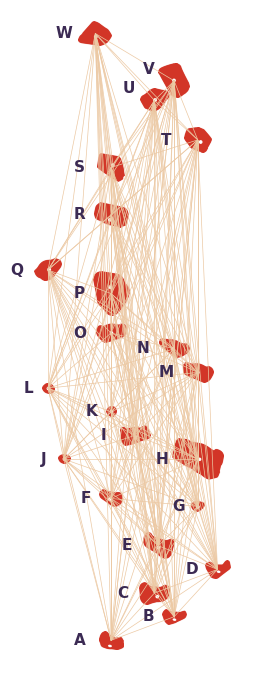

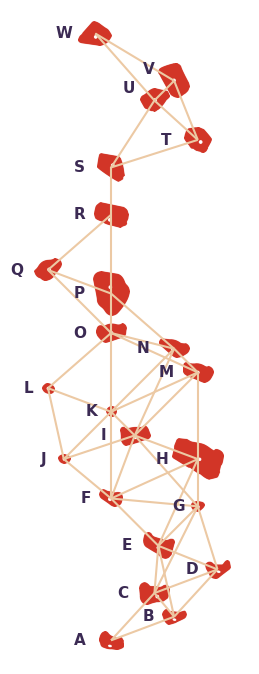

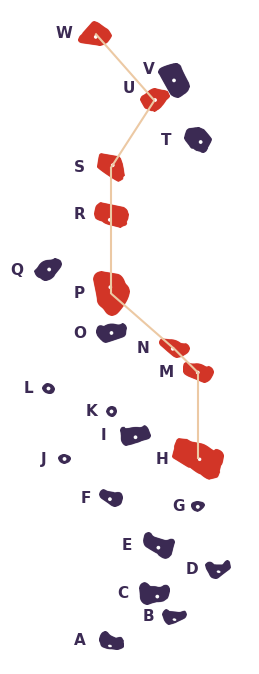

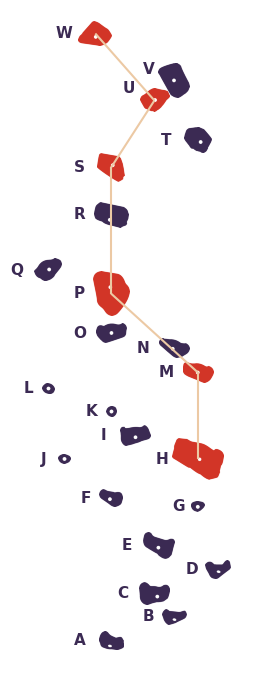

In [750]:
### Visualizations
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx

image_path = 'rock_node_images/'
size_mulitplier = 1
width, height = 3*size_mulitplier, 15*size_mulitplier

def load_images(G, coordinates, edged_coordinates, color):
    """
    Loads climbing hold images based on whether the node is in edge_names. If it is,
    it loads from red, if not, it loads from whatever color is provided in color
    """
    node_index = 0
    for i, node in enumerate(all_coordinates):
        if node in coordinates:
            if edged_coordinates:
                img_color = 'red' if all_coordinates[i] in edged_coordinates else color
            else:
                img_color = color
            G.add_node(node_index, image=mpimg.imread(f"{image_path}{img_color}/{nodes_list[i]}@10x.png"))
            node_index+=1

def add_edges(G, coordinates, edged_coordinates, edge_weight, COMPLETE):
    """
    Adds edges to the graph based on edged coordinates or all coordinates. The
    all coordinates functionality is for drawing a complete graph
    """
    if edged_coordinates:
        for i in range(len(edged_coordinates) - 1):
            start_idx = coordinates.index(edged_coordinates[i])
            end_idx = coordinates.index(edged_coordinates[i + 1])
            G.add_edge(start_idx, end_idx, weight=edge_weight)
    elif not COMPLETE:
        for i in range(len(coordinates)):
            for j in range(i + 1, len(coordinates)):
                # Calculate distance and store in both directions
                distance = math.dist(all_coordinates[i], all_coordinates[j])
                if distance < distance_threshold:
                    G.add_edge(i, j, weight=edge_weight)
    else:
        for i in range(len(coordinates)):
            for j in range(i + 1, len(coordinates)):
                G.add_edge(i, j, weight=edge_weight)


def draw_images(ax, G, pos):
    """
    Plots climbing hold images onto the graph given the graph object and the positions of 
    the coordinates. Maintains the aspect ratio of each image and scales them according to
    a scale factor
    """
    for node, data in G.nodes(data=True):
        image = data["image"]
        image_height, image_width = image.shape[:2]
        scale_factor = 0.0028
        scaled_width = image_width * scale_factor
        scaled_height = image_height * scale_factor
        ax.imshow(image, aspect='equal',
                  extent=(pos[node][0] - scaled_width / 2, pos[node][0] + scaled_width / 2,
                          pos[node][1] - scaled_height / 2, pos[node][1] + scaled_height / 2))

def graph_plotter(edge_names=None, title=None, coordinates=all_coordinates, COMPLETE=False, size_multiplier=size_mulitplier):
    """
    Plots the climb
    """
    if isinstance(coordinates[0], str):
        print("i received a string")
        coordinates = [all_coordinates_dict[node] for node in coordinates]
        print(coordinates==all_coordinates)

    G = nx.Graph()
    pos = {i: point for i, point in enumerate(coordinates)}

    if edge_names and isinstance(edge_names[0], str):
        edged_coordinates = [all_coordinates_dict[node] for node in edge_names]
    else:
        edged_coordinates = edge_names
    edge_weight = 1.5*size_multiplier if not COMPLETE else 0.5
    color = 'purple' if edge_names else 'red'
    
    add_edges(G, coordinates, edged_coordinates, edge_weight, COMPLETE)
    load_images(G, coordinates, edged_coordinates, color)

    fig, ax = plt.subplots(figsize=(width, height))
    nx.draw(G, pos, ax=ax, width=edge_weight, edge_color="#ECC9A4", node_size=0)

    draw_images(ax, G, pos)

    for node, (x, y) in pos.items():
        index = all_coordinates.index([x,y])
        label = string.ascii_uppercase[index]
        if label == "H":
            offset_x = -0.9
        elif label in "GJKL":
            offset_x = -0.5
        elif label in "FUVBD":
            offset_x = -0.65
        else: offset_x = -0.8
        offset_y = 0.3 if label in "UV" else 0
        ax.text(x + offset_x, 
                y + offset_y, 
                label, 
                fontsize=11*size_multiplier, 
                color='#3B2A53', 
                fontweight="bold", 
                ha='center', 
                va='center'
                )
        offset_y = 0

    x_margin, y_margin = 0.8, 0.6
    ax.set_xlim(min(x for x, y in pos.values()) - x_margin, max(x for x, y in pos.values()) + x_margin)
    ax.set_ylim(min(y for x, y in pos.values()) - y_margin, max(y for x, y in pos.values()) + y_margin)

    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()

graph_plotter(COMPLETE=True)
graph_plotter()
graph_plotter(shortest_path_HW)
graph_plotter(custom_final_route)

# Resources:

- https://www.datacamp.com/tutorial/dijkstra-algorithm-in-python 
- https://cartography-playground.gitlab.io/playgrounds/douglas-peucker-algorithm/
- https://en.wikipedia.org/wiki/Ramer–Douglas–Peucker_algorithm